<a href="https://colab.research.google.com/github/Senai538/Apple-Stock-Prediction-/blob/main/apple_project_close.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import math 

In [ ]:
df=pd.read_csv("/content/AAPL.csv.xls")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100751,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095495,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088485,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090676,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093304,73449600


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100751,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095495,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088485,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090676,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093304,73449600


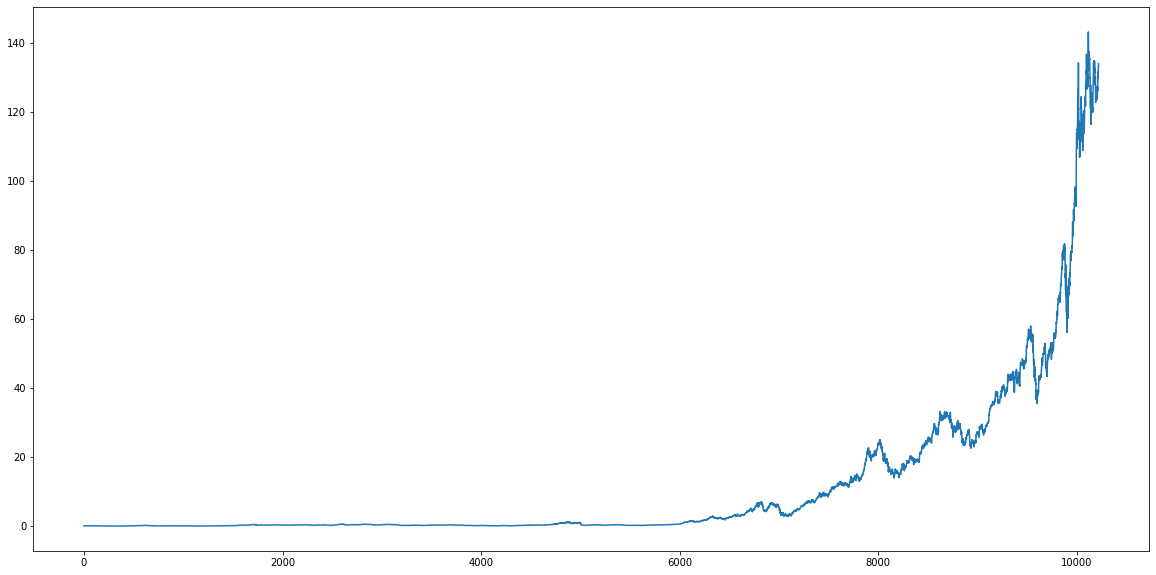

In [ ]:
df["Close"].plot()

In [ ]:
data=df.sort_index(ascending=True,axis=0)
print(df.head())

new_df=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

for i in range(0,len(data)):
  new_df["Date"][i]=df["Date"][i]
  new_df["Close"][i]=df["Close"][i]

        Date      Open      High       Low     Close  Adj Close     Volume
0 1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100751  469033600
1 1980-12-15  0.122210  0.122210  0.121652  0.121652   0.095495  175884800
2 1980-12-16  0.113281  0.113281  0.112723  0.112723   0.088485  105728000
3 1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090676   86441600
4 1980-12-18  0.118862  0.119420  0.118862  0.118862   0.093304   73449600


In [ ]:
new_df.head()

,Date,Close
0,1980-12-12 00:00:00,0.128348
1,1980-12-15 00:00:00,0.121652
2,1980-12-16 00:00:00,0.112723
3,1980-12-17 00:00:00,0.115513
4,1980-12-18 00:00:00,0.118862


In [ ]:
new_df.index=new_df.Date
new_df.drop("Date",axis='columns',inplace=True)
final_df=new_df.values
new_df.head()

,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862


In [ ]:
 new_df.shape

(10218, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
new_df=scaler.fit_transform(np.array(new_df).reshape(-1,1))


In [ ]:
print(new_df)

[[5.53703468e-04]
 [5.06914578e-04]
 [4.44522404e-04]
 ...
 [9.11257652e-01]
 [9.24114786e-01]
 [9.35853885e-01]]


In [ ]:
#Training test split
training_size=int(len(new_df)*0.80)
test_size=len(new_df)-training_size
train_data,test_data=new_df[0:training_size,:],new_df[training_size:len(new_df),:1]

In [ ]:
training_size

8174

In [ ]:
test_size

2044

In [ ]:
train_data

array([[0.0005537 ],
       [0.00050691],
       [0.00044452],
       ...,
       [0.11411854],
       [0.11541125],
       [0.11364687]])

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 80
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(8093, 80)
(8093,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(1963, 80)
(1963,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
###  LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(80,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 80, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 80, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=20,batch_size=64,verbose=1)


Epoch 1/20
127/127 [==============================] - 20s 154ms/step - loss: 2.1798e-06 - val_loss: 8.7725e-04
Epoch 2/20
127/127 [==============================] - 20s 158ms/step - loss: 2.1665e-06 - val_loss: 3.0371e-04
Epoch 3/20
127/127 [==============================] - 20s 157ms/step - loss: 2.3941e-06 - val_loss: 0.0011
Epoch 4/20
127/127 [==============================] - 20s 156ms/step - loss: 1.7458e-06 - val_loss: 3.3236e-04
Epoch 5/20
127/127 [==============================] - 20s 157ms/step - loss: 2.2929e-06 - val_loss: 5.6862e-04
Epoch 6/20
127/127 [==============================] - 20s 155ms/step - loss: 2.1309e-06 - val_loss: 8.3652e-04
Epoch 7/20
127/127 [==============================] - 20s 156ms/step - loss: 1.8925e-06 - val_loss: 4.6729e-04
Epoch 8/20
127/127 [==============================] - 20s 156ms/step - loss: 1.5935e-06 - val_loss: 5.5284e-04
Epoch 9/20
127/127 [==============================] - 20s 158ms/step - loss: 1.5805e-06 - val_loss: 5.9359e-04
Epoch

Accuracy is 89%

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

5.047630089835089

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

53.00745756673516

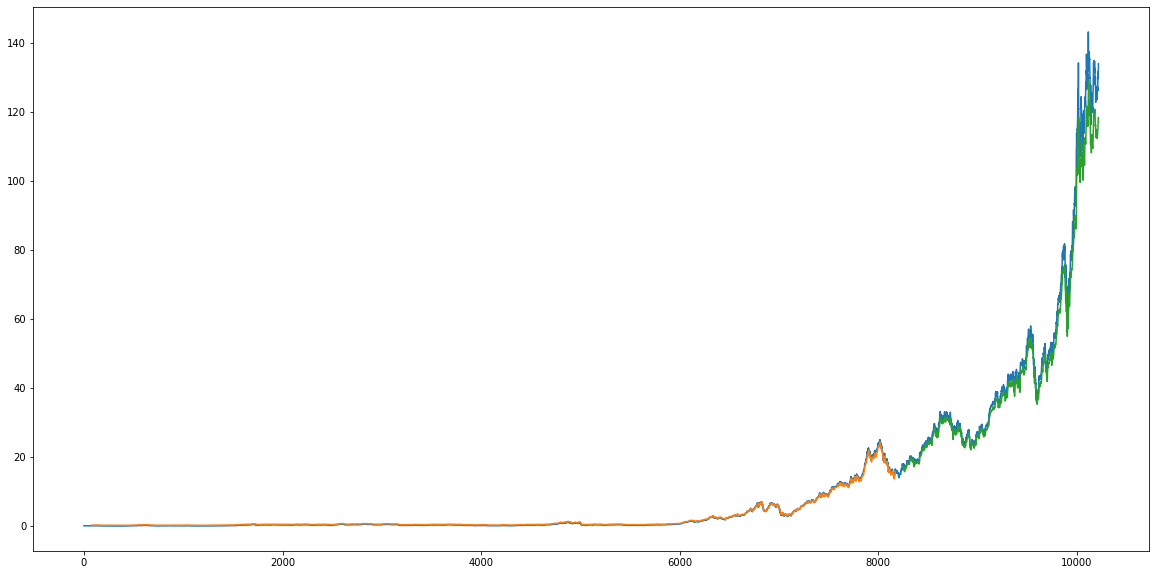

In [ ]:
look_back=80
trainPredictPlot = numpy.empty_like(new_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(new_df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(new_df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(new_df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
model.evaluate(X_test,ytest)

62/62 [==============================] - 2s 32ms/step - loss: 0.0011


0.0011132905492559075

Accuracy is 1- val_loss = **89%**